In [1]:
import cospar as cs
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import scvi
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

Global seed set to 0


In [2]:
#sc.settings.set_figure_params(dpi=100, facecolor='white')
cs.settings.set_figure_params()
cs.settings.data_path = "data_dir/cospar_data"
cs.settings.figure_path = "data_dir/cospar"
cs.hf.set_up_folders()


creating directory data_dir/cospar_data for saving data
creating directory data_dir/cospar for saving figures


In [52]:
adata = sc.read('/home/chang/data_dir/data.h5ad')
adata.uns["data_des"] = "data_dir/cospar"
adata

AnnData object with n_obs × n_vars = 2583 × 58302
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'clone', 'n_bcs', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.ann_level_1.score', 'predicted.ann_level_1', 'predicted.ann_level_2.score', 'predicted.ann_level_2', 'predicted.ann_level_3.score', 'predicted.ann_level_3', 'predicted.ann_level_4.score', 'predicted.ann_level_4', 'predicted.ann_level_5.score', 'predicted.ann_level_5', 'predicted.ann_finest_level.score', 'predicted.ann_finest_level', 'mapping.score', 'unique_clone', 'SCT_snn_res.0.8', 'nCount_tfswmean', 'nFeature_tfswmean', 'Condition', 'clusters', 'clone2', 'time_info'
    uns: 'data_des'
    obsm: 'X_pca', 'X_umap'

In [53]:
cs.pp.get_X_clone(adata,adata.obs.index.tolist(),adata.obs.clone2.tolist())
#adata.obs["state_info"] = adata.obs['predicted.ann_finest_level'].astype(str)
adata.obs["state_info"] = adata.obs['clusters'].astype(str)
adata.obs["time_info"] = adata.obs['time_info'].astype(str)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2583/2583 [00:00<00:00, 979290.18it/s]


In [54]:
#cs.pp.get_highly_variable_genes(adata)
#cs.pp.remove_cell_cycle_correlated_genes(adata,cycling_gene_list)
#cs.pp.get_X_pca(adata)
#cs.pp.get_X_emb(adata)

In [55]:
adata.obsm['X_emb'] = adata.obsm['X_umap']

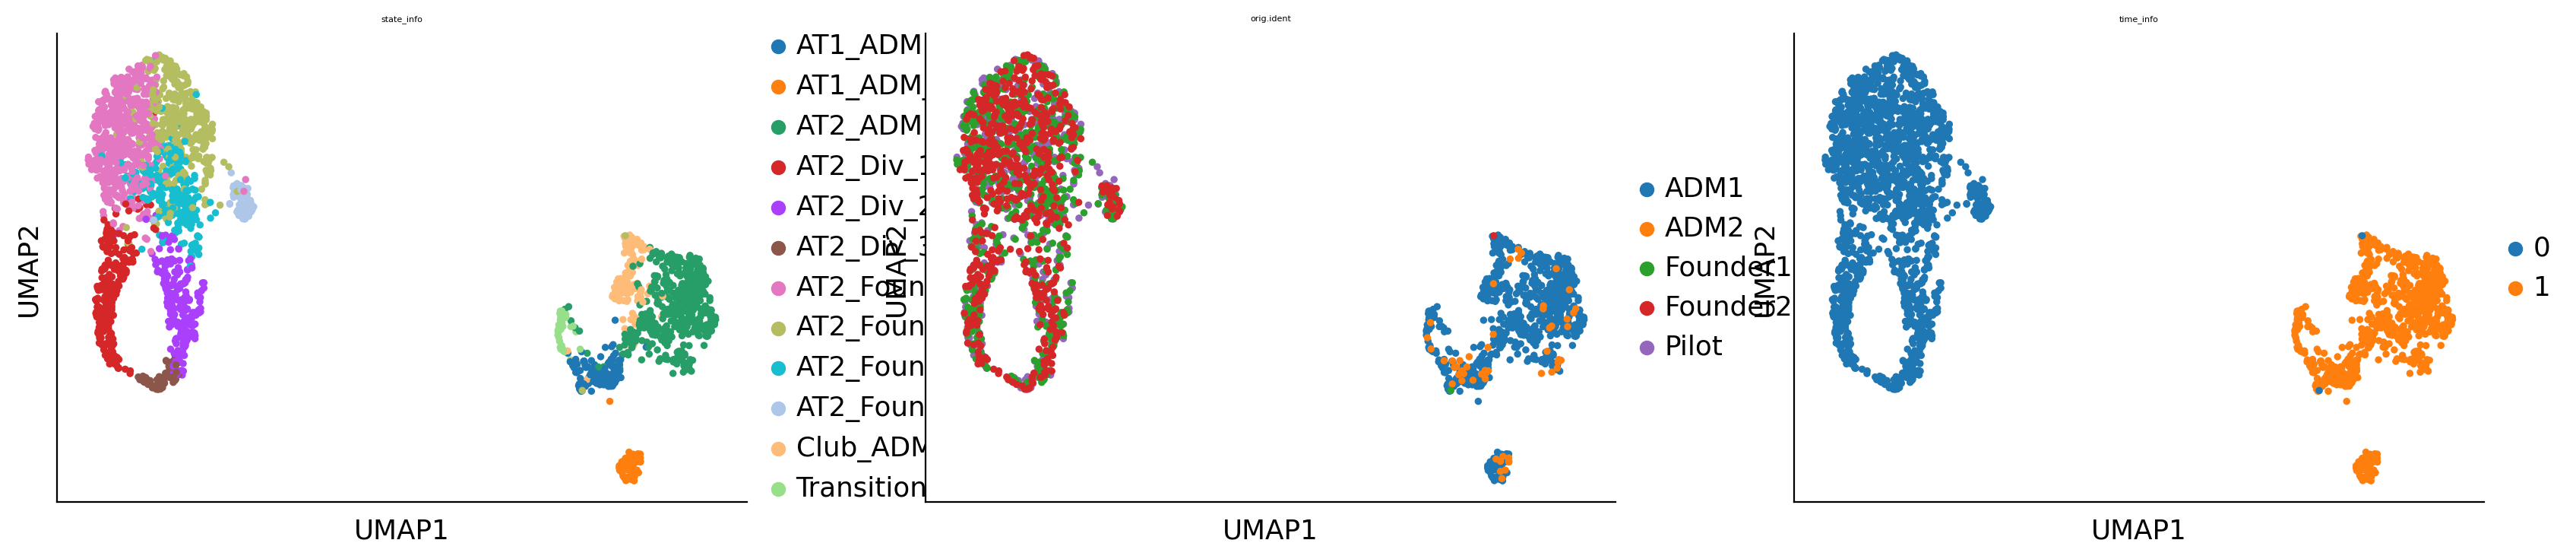

In [106]:
sc.pl.umap(adata,  color=['state_info', 'orig.ident', "time_info"])

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:title={'center':'137 clones'}>

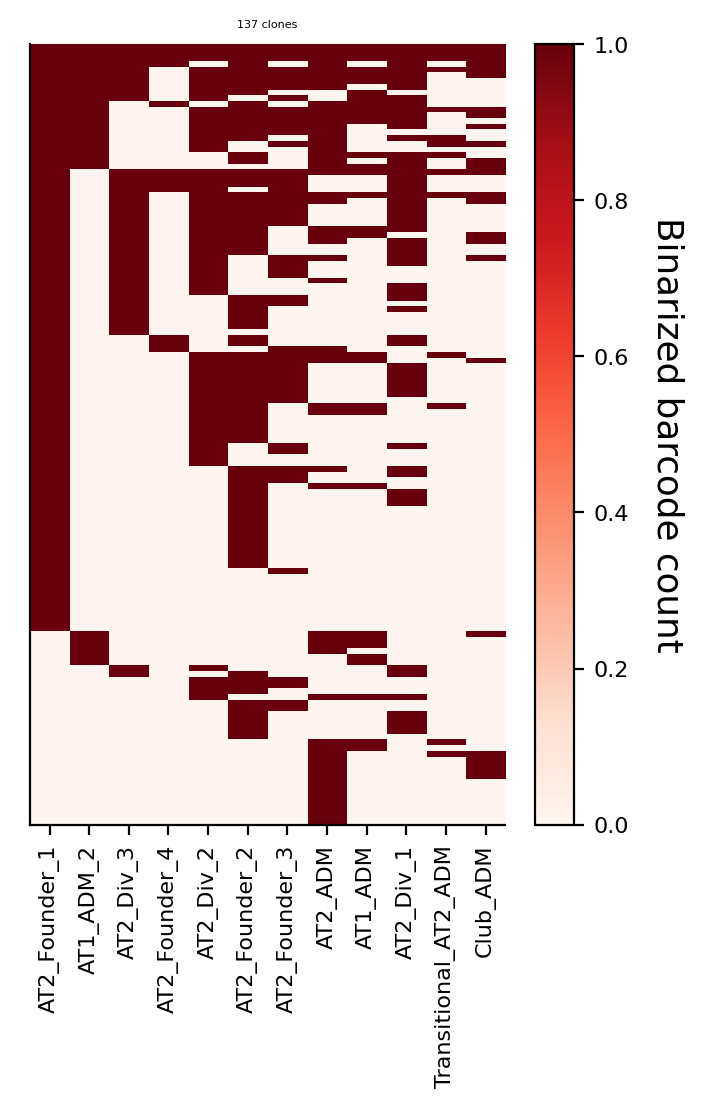

In [84]:
cs.pl.barcode_heatmap(adata,selected_times=None,
        color_bar=True,log_transform=False,binarize=True)

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:title={'center':'137 clones'}>

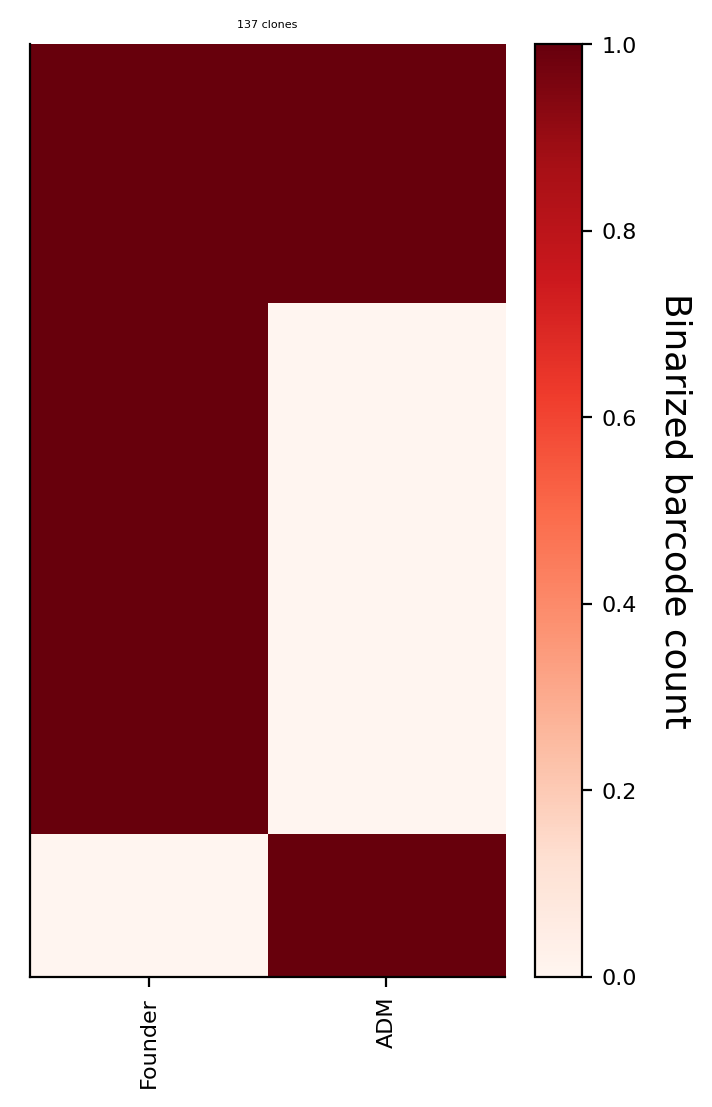

In [107]:
adata.obs["state_info"] = adata.obs['Condition'].astype(str)
cs.pl.barcode_heatmap(adata,selected_times=None,
        color_bar=True,log_transform=False,binarize=True)

In [85]:
cs.tl.fate_coupling(adata,source='X_clone') # compute the fate coupling

normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

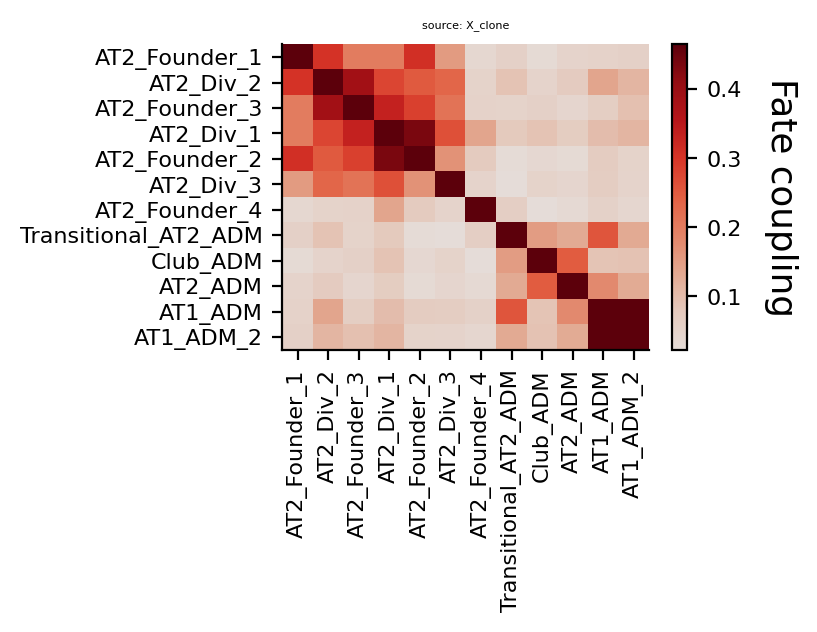

In [86]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

cs.pl.fate_coupling(adata,source='X_clone') # actually plot the coupling

In [87]:
cs.tl.fate_hierarchy(adata,source='X_clone') # compute the fate hierarchy
cs.pl.fate_hierarchy(adata,source='X_clone') # actually plot the hierarchy

normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-n

In [88]:
my_tree_refined = adata.uns["fate_hierarchy_X_clone"]["tree"]

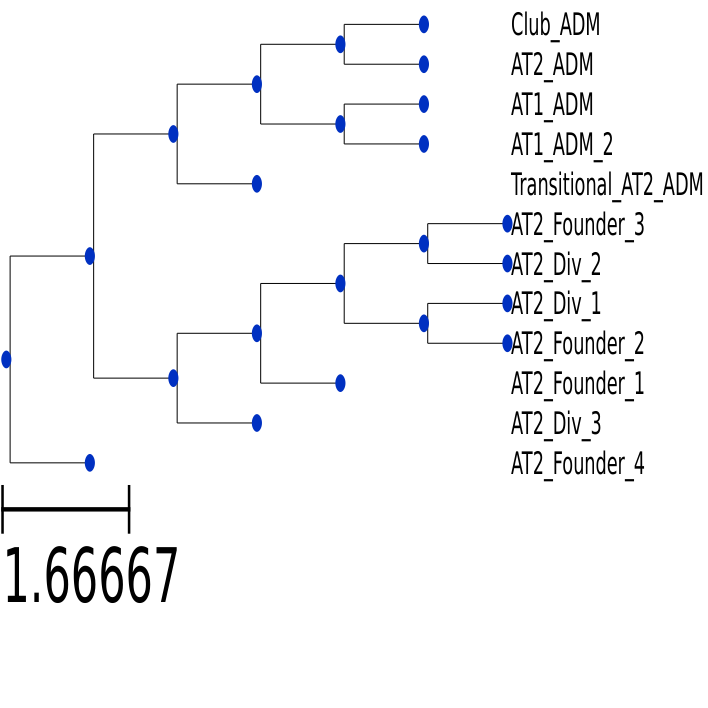

In [89]:
cs.pl.visualize_tree(
    my_tree_refined,
    color_coding=None,
    mode="r",
    data_des=f"my_tree",
    figure_path="/home/chang/data_dir/cospar",
    dpi=300
)

------Compute the full Similarity matrix if necessary------
--> Compute similarity matrix: computing new; beta=0.1
Smooth round: 1
--> Time elapsed: 0.005738973617553711
Smooth round: 2
--> Time elapsed: 0.03062748908996582
Smooth round: 3
--> Time elapsed: 0.13242888450622559
--> Orignal sparsity=0.29680754580899055, Thresholding
--> Final sparsity=0.21954951588673013
similarity matrix truncated (Smooth round=3):  0.09824895858764648
Smooth round: 4
--> Time elapsed: 0.24805140495300293
--> Orignal sparsity=0.42566835269591563, Thresholding
--> Final sparsity=0.309216775039273
similarity matrix truncated (Smooth round=4):  0.08251547813415527
Smooth round: 5
--> Time elapsed: 0.34653472900390625
--> Orignal sparsity=0.4792675657523679, Thresholding
--> Final sparsity=0.3707213953949174
similarity matrix truncated (Smooth round=5):  0.09870600700378418
--> Save the matrix at every 5 rounds
Smooth round: 6
--> Time elapsed: 0.33742761611938477
--> Orignal sparsity=0.5179354752454665, Th

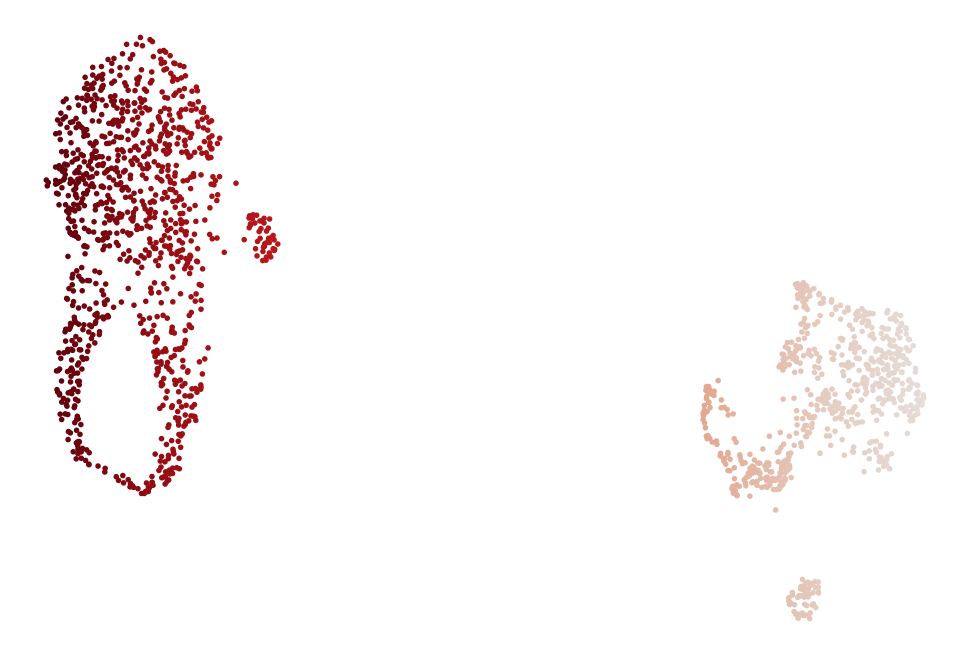

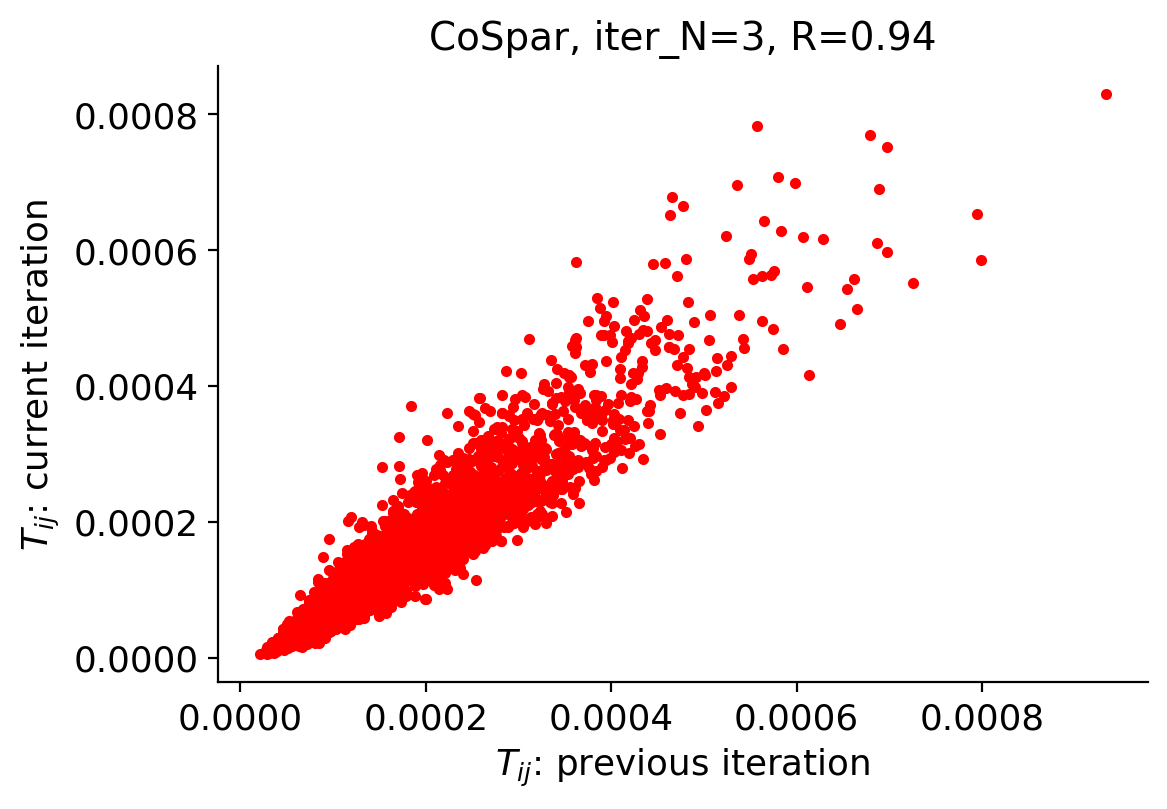

Iteration 4, Use smooth_round=5
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
--> Start to smooth the refined clonal map
--> Phase I: time elapsed --  0.009004354476928711
--> Phase II: time elapsed --  0.018564462661743164


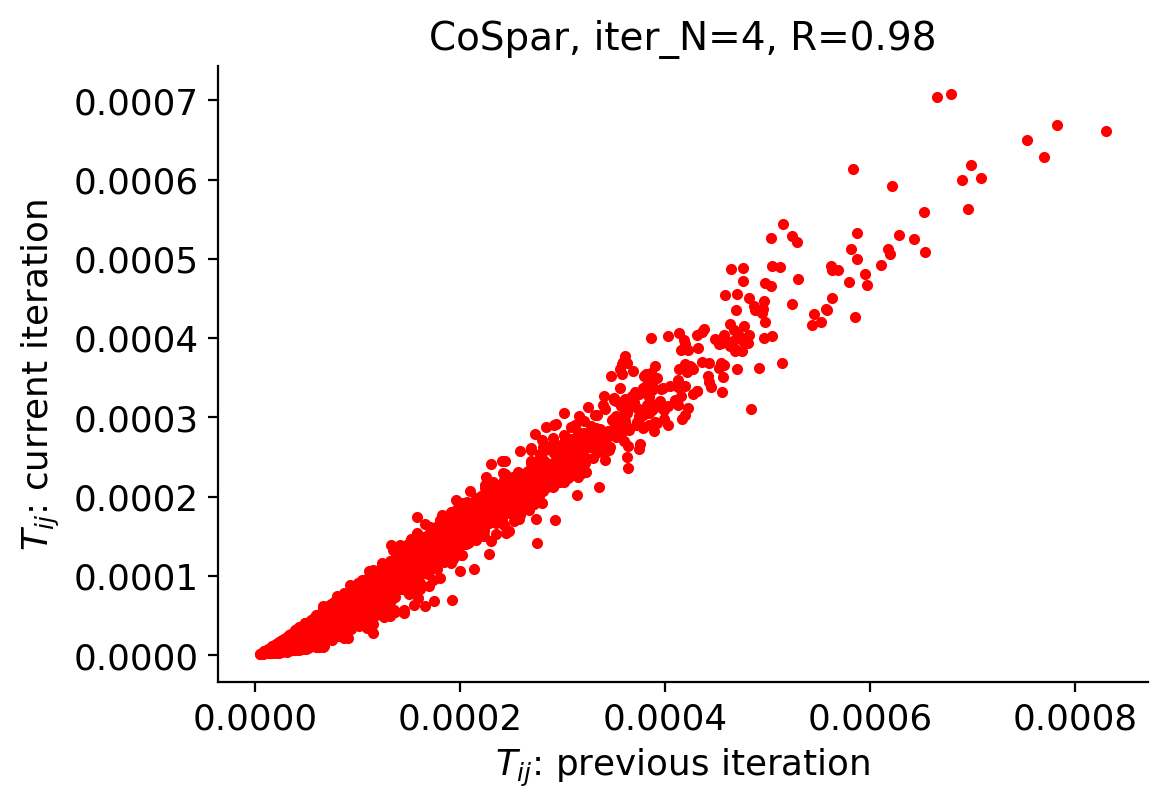

Iteration 5, Use smooth_round=5
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
--> Start to smooth the refined clonal map
--> Phase I: time elapsed --  0.007488727569580078
--> Phase II: time elapsed --  0.016408443450927734


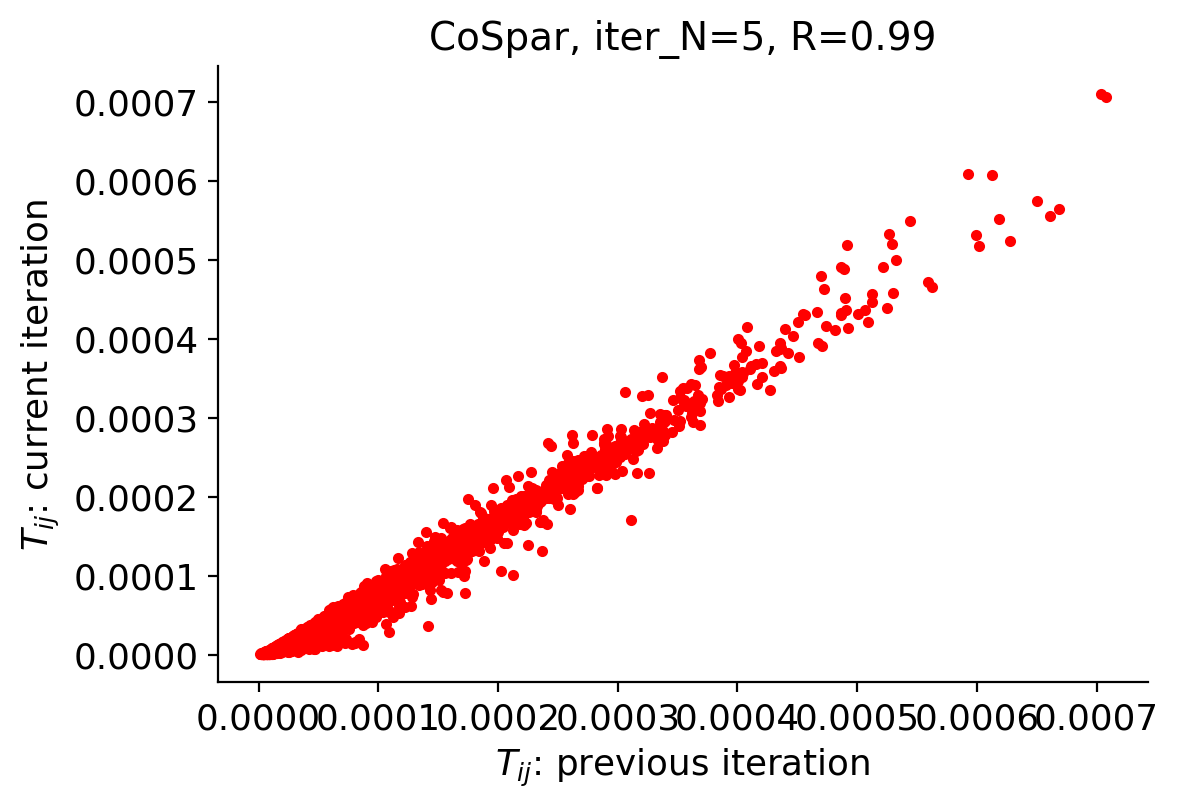

--> No need for Final Smooth (i.e., clonally-labeled states are the final state space for Tmap)
--> ----Intraclone transition map----
--> Clone normalization
--> Relative time point pair index: 0
--> Clone id: 0
-----------Total used time: 20.810390949249268 s ------------


In [19]:
adata2 = cs.tmap.infer_Tmap_from_multitime_clones(
    adata,
    clonal_time_points=["0","1"],
    sparsity_threshold=0.1,
    intraclone_threshold=0.2,
    max_iter_N=10,
    epsilon_converge=0.01,
)

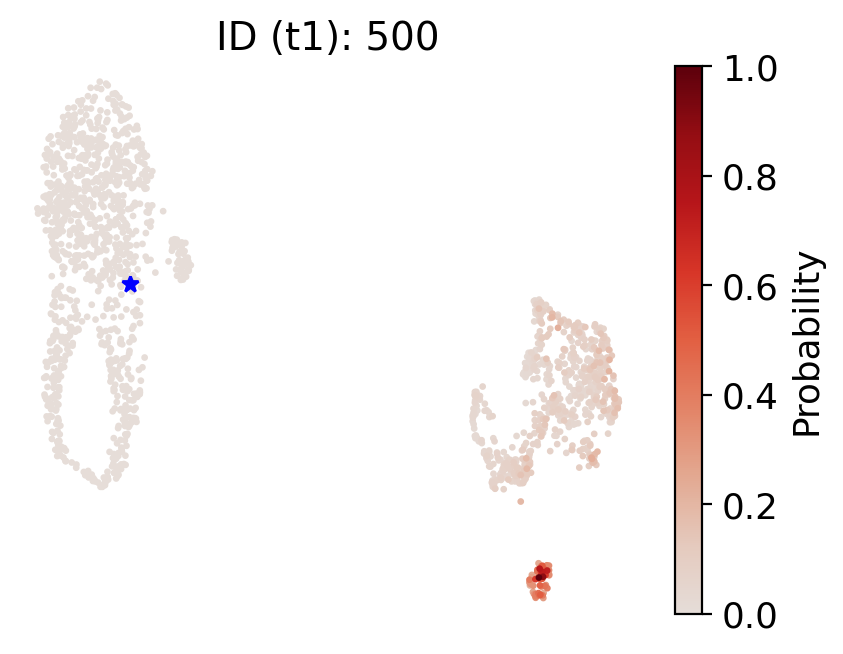

In [36]:
map_backward = False
cs.pl.single_cell_transition(
    adata2,
    selected_state_id_list=[500],
    source="transition_map",
    map_backward=map_backward,
)

Results saved at adata.obs['fate_map_transition_map_AT2_Founder_1']
Results saved at adata.obs['fate_map_transition_map_AT1_ADM_2']
Results saved at adata.obs['fate_map_transition_map_AT2_Div_3']
Results saved at adata.obs['fate_map_transition_map_AT2_Founder_4']
Results saved at adata.obs['fate_map_transition_map_AT2_Founder_2']
Results saved at adata.obs['fate_map_transition_map_AT2_Div_2']
Results saved at adata.obs['fate_map_transition_map_AT2_Founder_3']
Results saved at adata.obs['fate_map_transition_map_AT2_ADM']
Results saved at adata.obs['fate_map_transition_map_AT1_ADM']
Results saved at adata.obs['fate_map_transition_map_AT2_Div_1']
Results saved at adata.obs['fate_map_transition_map_Transitional_AT2_ADM']
Results saved at adata.obs['fate_map_transition_map_Club_ADM']
Results saved at adata.obs['fate_potency_transition_map']


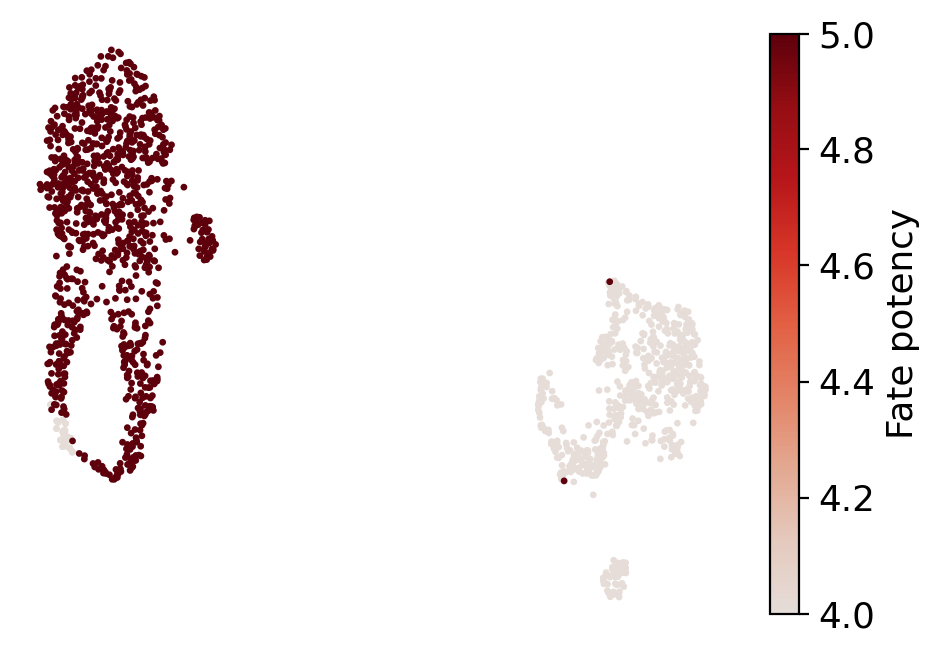

In [25]:
cs.tl.fate_potency(
    adata2,
    source="transition_map",
    map_backward=True,
    method="norm-sum",
    fate_count=True,
)
cs.pl.fate_potency(adata2, source="transition_map")

Use pre-computed fate map


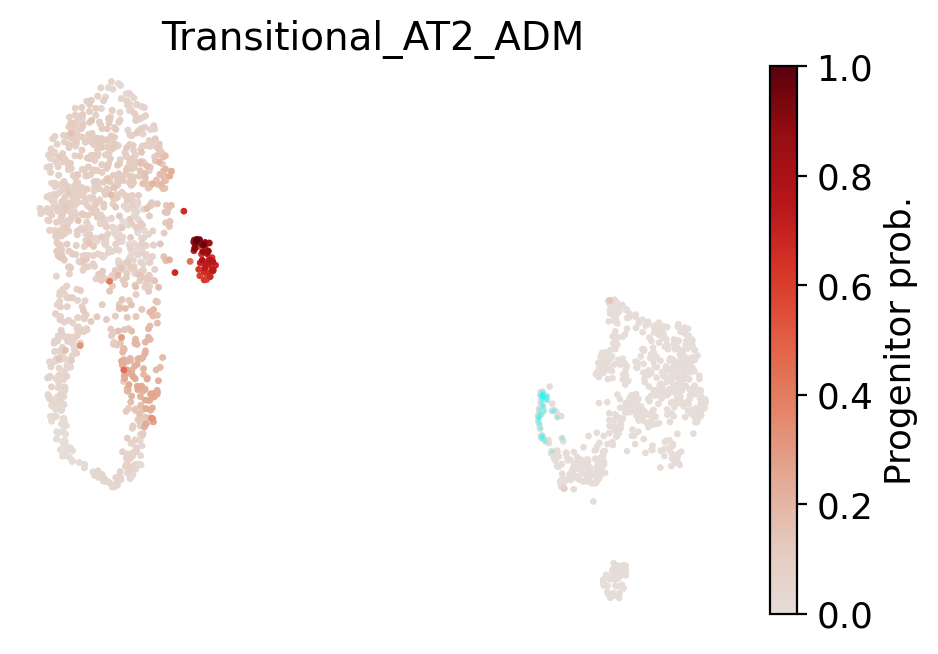

In [42]:
cs.tl.fate_map(
    adata2,
    selected_fates=["Transitional_AT2_ADM", "AT1_ADM",  "AT1_ADM_2", "Club_ADM", "AT2_ADM"],
    source="transition_map",
    map_backward=True,
)
cs.pl.fate_map(
    adata2,
    selected_fates=["Transitional_AT2_ADM"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

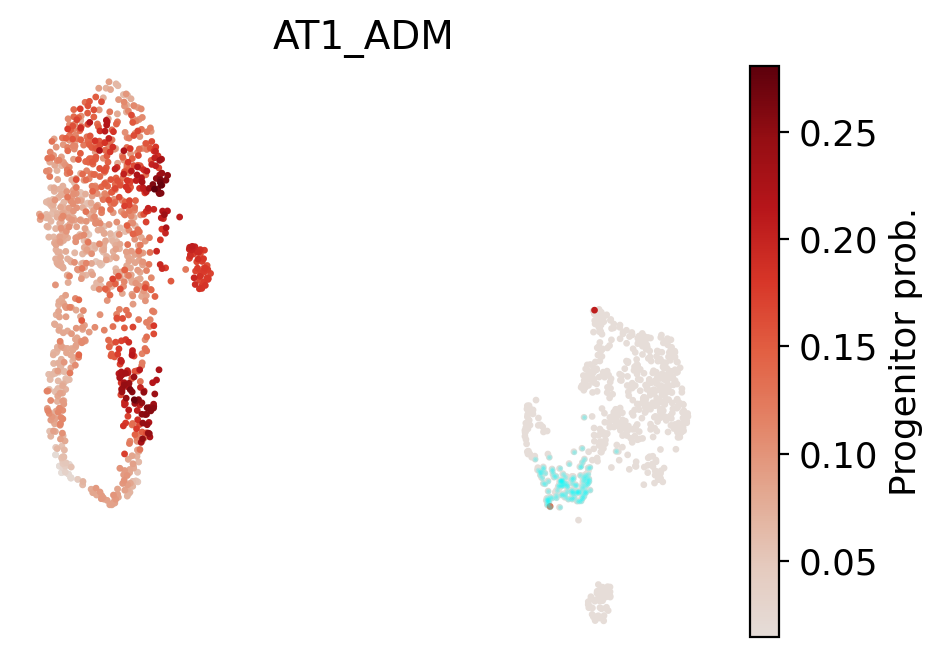

In [38]:
cs.pl.fate_map(
    adata2,
    selected_fates=["AT1_ADM"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

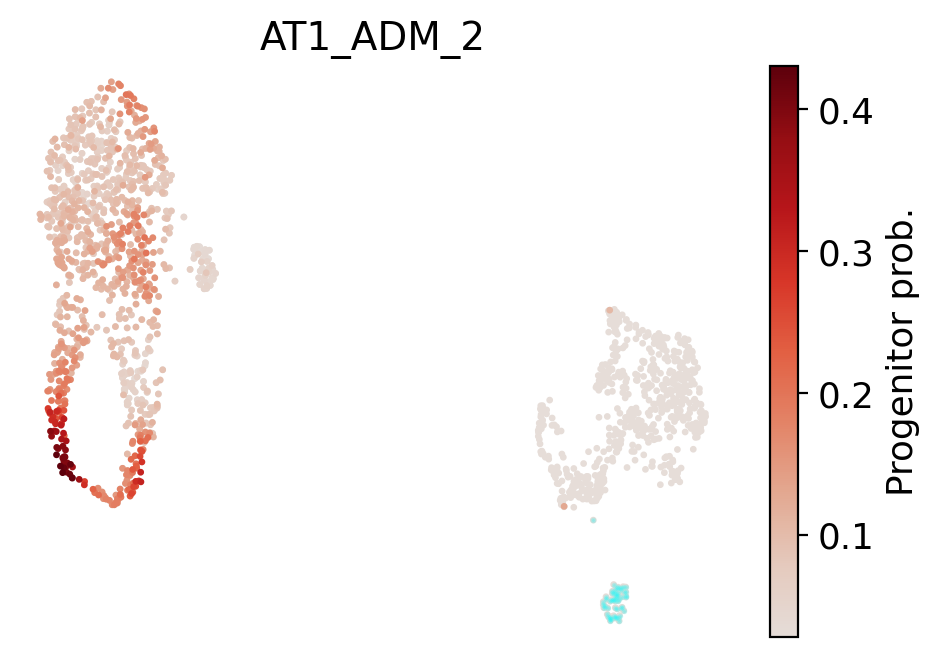

In [40]:
cs.pl.fate_map(
    adata2,
    selected_fates=["AT1_ADM_2"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

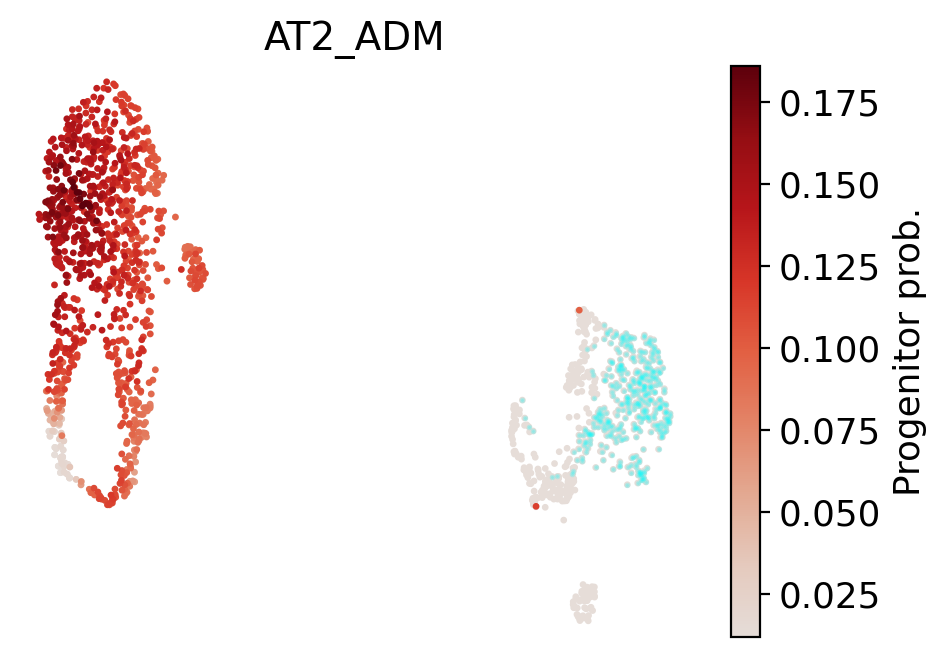

In [43]:
cs.pl.fate_map(
    adata2,
    selected_fates=["AT2_ADM"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

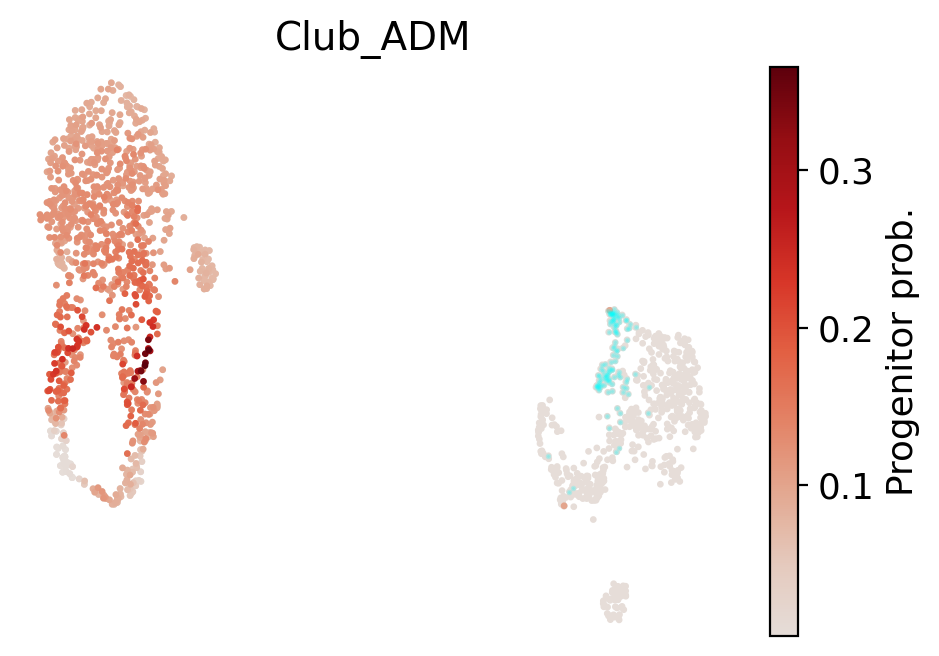

In [44]:
cs.pl.fate_map(
    adata2,
    selected_fates=["Club_ADM"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

 'AT2_Founder_4' 'AT2_Div_3'] are ignored due to lack of cells
Results saved as dictionary at adata.uns['fate_coupling_transition_map']


<AxesSubplot:title={'center':'source: transition_map'}>

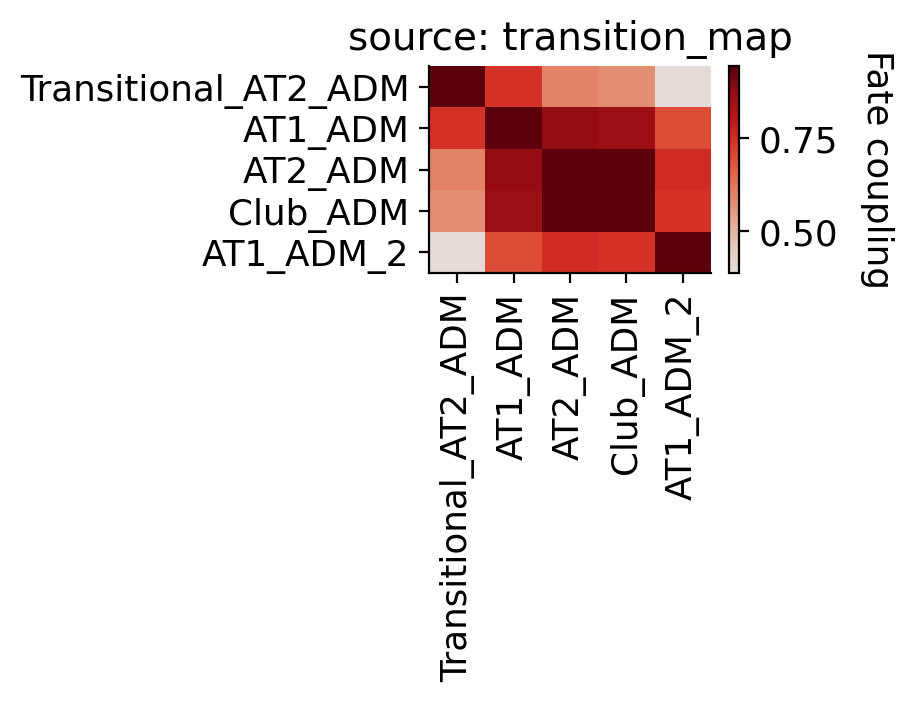

In [51]:
cs.tl.fate_coupling(adata2, selected_fates=adata.obs['clusters'].unique(), source="transition_map")
cs.pl.fate_coupling(adata2, source="transition_map")


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 858.02it/s]


Data saved at adata.uns['clonal_fate_bias']


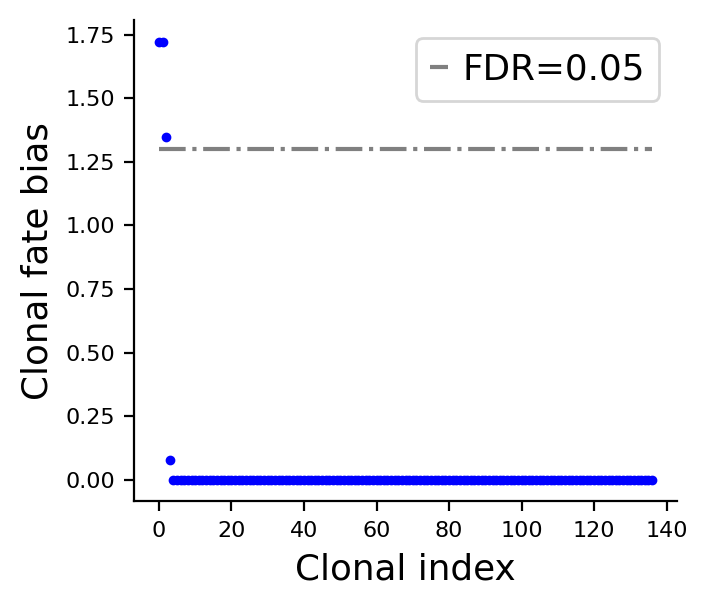

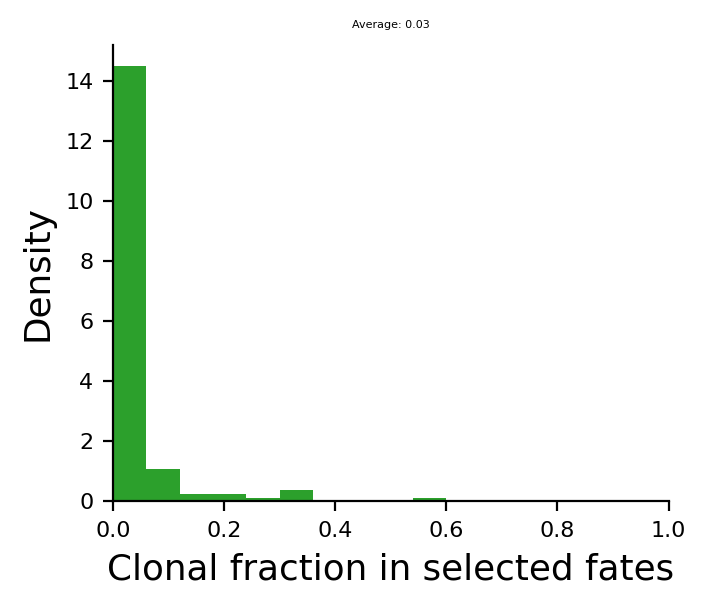

In [103]:
cs.tl.clonal_fate_bias(adata,selected_fate="AT1_ADM_2",alternative='two-sided') # compute the fate hierarchy
cs.pl.clonal_fate_bias(adata) # actually plot the hierarchy

In [104]:
result=adata.uns['clonal_fate_bias']
result

,Clone_ID,Clone_size,Q_value,Fate_bias,clonal_fraction_in_target_fate
0,87,5.0,0.018937,1.722700,0.600000
1,45,25.0,0.018937,1.722700,0.200000
2,43,19.0,0.044661,1.350072,0.210526
3,82,26.0,0.838560,0.076466,0.115385
4,97,53.0,1.000000,-0.000000,0.000000
...,...,...,...,...,...
132,37,5.0,1.000000,-0.000000,0.000000
133,36,34.0,1.000000,-0.000000,0.029412
134,35,18.0,1.000000,-0.000000,0.055556
135,51,7.0,1.000000,-0.000000,0.142857


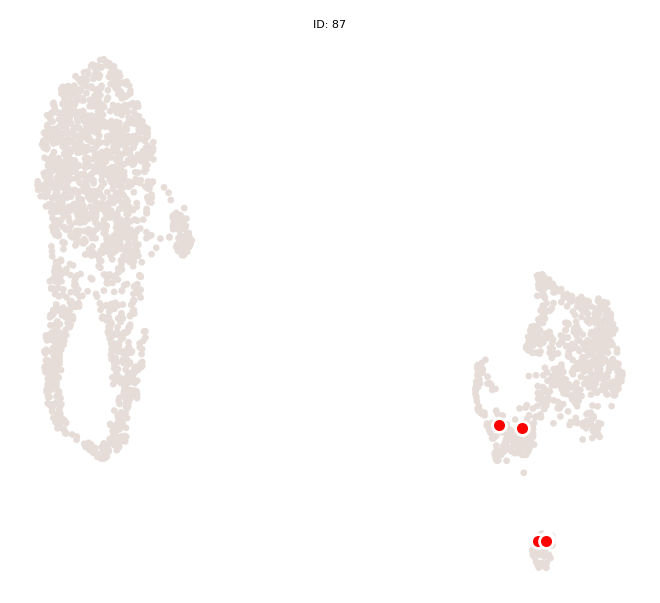

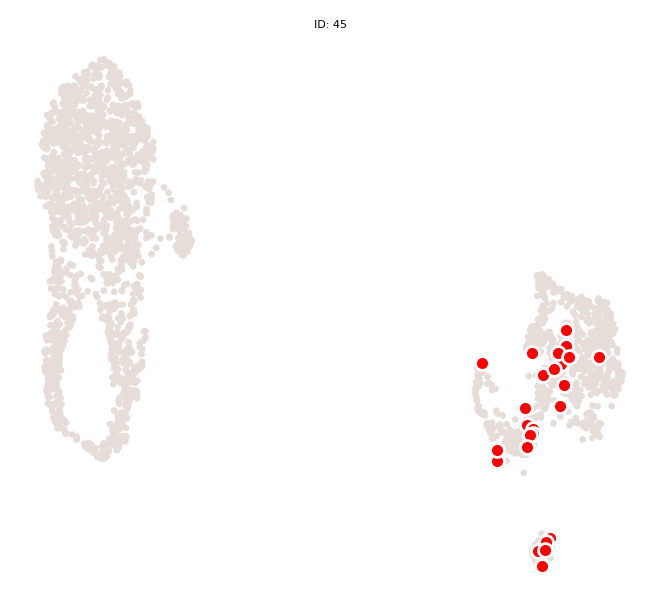

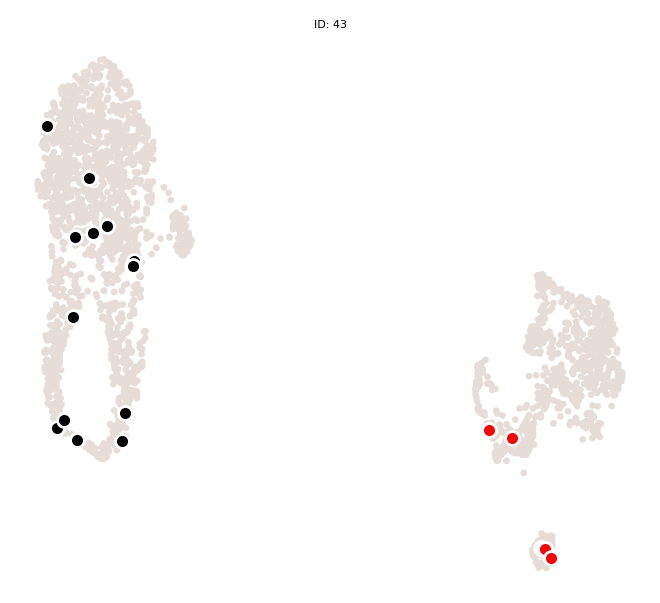

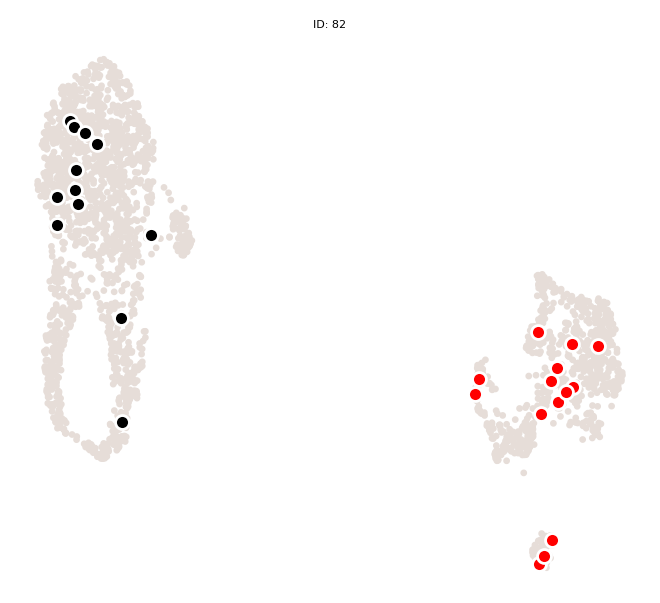

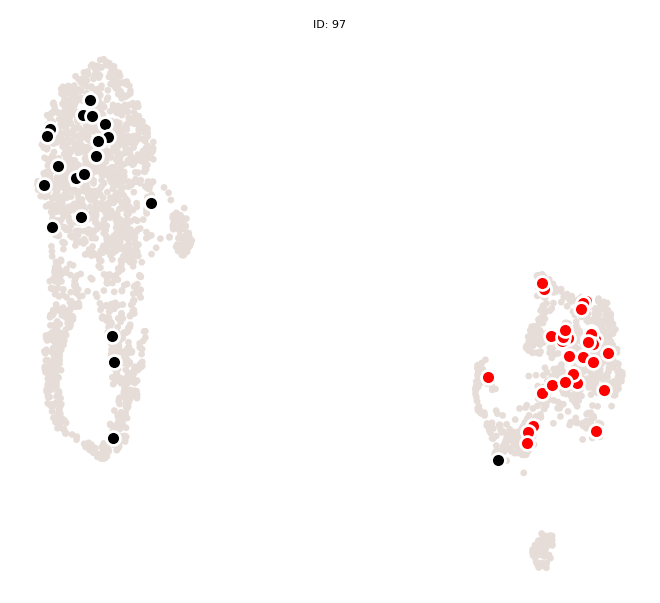

In [105]:
ids=result['Clone_ID'][:5]
cs.pl.clones_on_manifold(adata,selected_clone_list=ids,color_list=['black','red','blue'],clone_markersize=10,)